In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import librosa
import os, json, glob
import matplotlib.pyplot as plt
import librosa
from utils import *
from operations import *

In [31]:
MONO_SEGMENTS_DIR = "/Volumes/MacOnly/UG_proc/all_time_top_by_hits/mono_audio_segments"
ANNO_DIR = (
    "/Volumes/MacOnly/UG_proc/all_time_top_by_hits/clean_single_track_annotations"
)
def find_anno(file, anno_dir=ANNO_DIR):
    segment_name_with_onset, _ = os.path.splitext(file.split("/")[-1])
    segment_name = "_".join(segment_name_with_onset.split("_")[:-1])
    anno_file_name = segment_name + ".json"
    anno_file = os.path.join(anno_dir, anno_file_name)
    return anno_file

def plot_f0_vs_gt(file, audio_dir=MONO_SEGMENTS_DIR, anno_dir=ANNO_DIR):
    file = os.path.join(audio_dir, file)
    y, sr = librosa.load(file, sr=None)
    f0, _, _ = librosa.pyin(
        y, fmin=librosa.note_to_hz("C2"), fmax=librosa.note_to_hz("E6"), sr=sr, center=False
    )
    times = librosa.times_like(f0, sr=sr, hop_length=512, n_fft=2048)
    notes = librosa.hz_to_midi(f0)

    anno_file = find_anno(file, anno_dir=anno_dir)
    with open(anno_file) as anno:
        note_infos = json.load(anno)

    gt = np.empty_like(notes)
    gt[:] = np.NaN

    for note in note_infos:
        onset = note["time"]["start"] * sr
        offset = (note["time"]["start"] + note["time"]["dur"]) * sr
        onset_fr = librosa.samples_to_frames(onset, hop_length=512)
        offset_fr = librosa.samples_to_frames(offset, hop_length=512)
        gt[onset_fr:offset_fr] = note["pitch"]

    plt.plot(times, notes, label="pYIN", color="blue")
    plt.plot(times, gt, label="GT", color="red")
    plt.legend()
    plt.show()

## Preprocessing: filter the mono segments
Remove a segment if
1. its duration (after removing leading and trailing zeros) is too short
2. its annotation is empty

In [62]:
# remove a segment if its trimmed duration is shorter than DUR_THRES
# pure silence segments won't be removed by this because they won't be trimmed
# one frame 2048 / 44100 = 0.046 seconds
DUR_THRES = 0.2 # seconds
FILTERED_AUDIO_DIR = "/Volumes/MacOnly/UG_proc/all_time_top_by_hits/mono_audio_segments_filtered"
FILTERED_ANNO_DIR = "/Volumes/MacOnly/UG_proc/all_time_top_by_hits/clean_single_track_annotations_filtered"

for file in glob.glob(os.path.join(FILTERED_AUDIO_DIR, "*.wav")):
    anno_file = find_anno(file, anno_dir=FILTERED_ANNO_DIR)
    y, sr = librosa.load(file, sr=None)
    y_trimmed, _ = librosa.effects.trim(y)
    dur = librosa.get_duration(y_trimmed, sr=sr)
    if dur < DUR_THRES:
        os.remove(file)
        os.remove(anno_file)
        segment_name = file.split("/")[-1]
        print(f"removed {segment_name}")
# this removed 2315 segments

removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_46_129s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_47_130s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_50_132s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_53_137s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_58_142s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_71_213s.wav
removed Adele - Rolling In The Deep_Acoustic guitar (muted)_0_152s.wav
removed Avenged Sevenfold - Afterlife_  Synyster Gates - Rhythm_49_282s.wav
removed Avenged Sevenfold - Afterlife_  Synyster Gates - Rhythm_50_282s.wav
removed Avenged Sevenfold - Afterlife_  Synyster Gates - Rhythm_51_283s.wav
removed Avenged Sevenfold - Afterlife_  Synyster Gates - Rhythm_52_284s.wav
removed Avenged Sevenfold - Afterlife_  Synyster Gates - Rhythm_53_285s.wav
removed Avenged Sevenfold - Afterlife_  Synyster Gates - Rhythm_54_285s.wav

In [64]:
# remove a segment if its annotation is empty
# many files removed in the last step will also be removed at this step
# pure silence will be removed at this step
FILTERED_AUDIO_DIR = "/Volumes/MacOnly/UG_proc/all_time_top_by_hits/mono_audio_segments_filtered"
FILTERED_ANNO_DIR = "/Volumes/MacOnly/UG_proc/all_time_top_by_hits/clean_single_track_annotations_filtered"

for file in glob.glob(os.path.join(FILTERED_AUDIO_DIR, "*.wav")):
    anno_file = find_anno(file, anno_dir=FILTERED_ANNO_DIR)
    with open(anno_file) as annotation:
        anno = json.load(annotation)
    if len(anno) == 0:
        os.remove(file)
        os.remove(anno_file)
        segment_name = file.split("/")[-1]
        print(f"removed {segment_name}")
# this removed 4235 segments (when run on its own)
# this removed another 3273 segments (when run after the last cell)

removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_0_3s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_10_20s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_11_21s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_13_25s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_14_26s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_16_30s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_17_31s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_19_35s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_1_5s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_20_36s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_22_40s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_23_41s.wav
removed ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_2

## Segment the F0 curve and recognize candidate regions

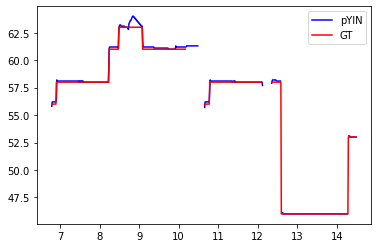

In [75]:
file = "Guns N' Roses - Welcome To The Jungle (ver 3)_Solo Guitar_0_0s.wav"
plot_f0_vs_gt(file)

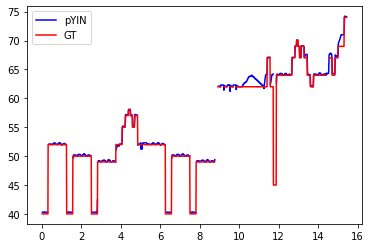

In [74]:
file = "ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_43_105s.wav"
plot_f0_vs_gt(file)

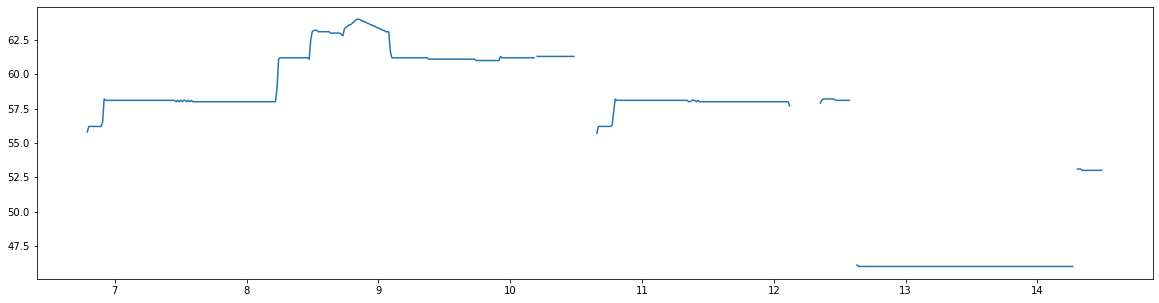

In [103]:
FILTERED_AUDIO_DIR = "/Volumes/MacOnly/UG_proc/all_time_top_by_hits/mono_audio_segments_filtered"
file = "Guns N' Roses - Welcome To The Jungle (ver 3)_Solo Guitar_0_0s.wav"
file = os.path.join(FILTERED_AUDIO_DIR, file)
y, sr = librosa.load(file, sr=None)
f0, _, _ = librosa.pyin(
    y, fmin=librosa.note_to_hz("C2"), fmax=librosa.note_to_hz("E6"), sr=sr, center=False
)
times = librosa.times_like(f0, sr=sr, hop_length=512, n_fft=2048)
notes = librosa.hz_to_midi(f0)
plt.figure(figsize=(20,5))
plt.plot(times, notes)

### Split the estimated F0 curve at NaN, into segments
NaN in the F0 curve marks the discontinuity (silence) in the F0. The segments around the silence must belong to two separate note events. 

In [42]:
# group consecutive elements in the array
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

# valid_indices are the indices of non-NaN elements
valid_indices = [i for i in range(len(notes)) if not np.isnan(notes[i])]
# group the consecutive indices into index_segments
index_segments = consecutive(valid_indices)

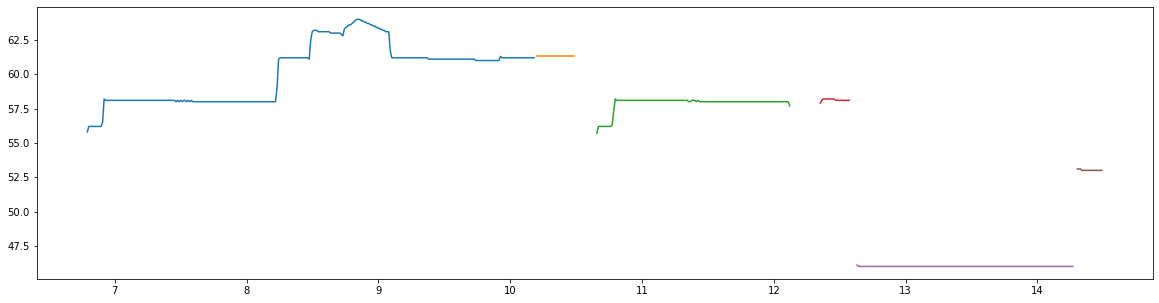

In [102]:
# each index_segment marks a continuous F0 segment
plt.figure(figsize=(20,5))
for segment in index_segments:
    plt.plot(times[segment], notes[segment])
# next I should split each F0 segment into note events
# index segments that are too short should be discarded

### Group adjacent F0 frames into a single note event if their pitch difference is smaller than a semitone (100 cents)

We focus on bend, slide, hammer-on, pull-off, and vibrato. \
Bend/slide/vibrato should not introduce sudden frequency changes. \
Hammer-on/pull-off may introduce sudden frequency changes. 

Observation: using 2048 framesize, hammer-on instance will cause a two-semitone freq change in one frame, and will be separated into two note events. 

This is ok, but try a smaller framesize and see what happens. \
Smaller framesize will introduce NaNs freqs in between the hammer-on instance, inevitably breaking it into two note events. Also, F0 estimation is worse when using 1024 framesize. 

What about a larger framesize? \
Larger framesize tend to merge note events together. A normal note (8.46s) and a following bend-release (8.70s) are merged into one note event in this example. 

#### Framesize 2048

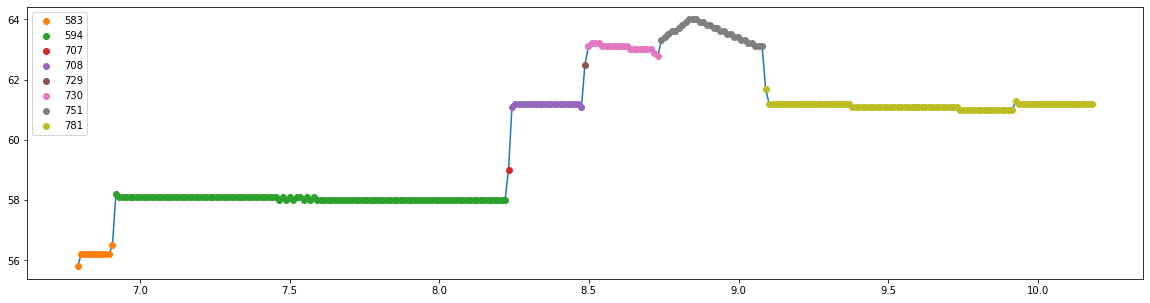

In [98]:
# example: the first F0 segment (293 frames)
index_segment = index_segments[0]
# check that the indices in the segment is indeed continuous
assert np.all(np.diff(index_segment, n=1) == 1)

previous_note = notes[index_segment[0]]
segment = [index_segment[0]]
segments = []

for i in index_segment[1:]:
    if abs(notes[i] - previous_note) <= 0.5:
        segment.append(i)
        if i == index_segment[-1]:
            segments.append(segment)
    else:
        segments.append(segment)
        segment = [i]
    previous_note = notes[i]

plt.figure(figsize=(20,5))
plt.plot(times[index_segment], notes[index_segment])
for segment in segments:
    plt.plot(times[segment], notes[segment], 'o', label=segment[0])
plt.legend()
plt.show()

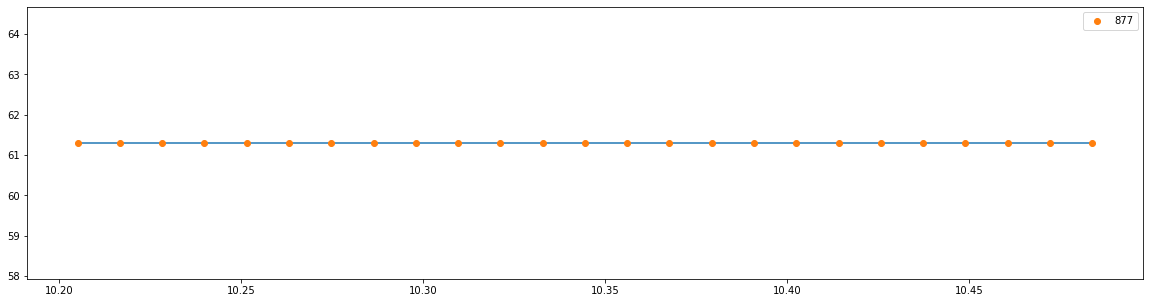

In [97]:
index_segment = index_segments[1]
# check that the indices in the segment is indeed continuous
assert np.all(np.diff(index_segment, n=1) == 1)

previous_note = notes[index_segment[0]]
segment = [index_segment[0]]
segments = []

for i in index_segment[1:]:
    if abs(notes[i] - previous_note) <= 0.5:
        segment.append(i)
        if i == index_segment[-1]:
            segments.append(segment)
    else:
        segments.append(segment)
        segment = [i]
    previous_note = notes[i]

plt.figure(figsize=(20,5))
plt.plot(times[index_segment], notes[index_segment])
for segment in segments:
    plt.plot(times[segment], notes[segment], 'o', label=segment[0])
plt.legend()
plt.show()

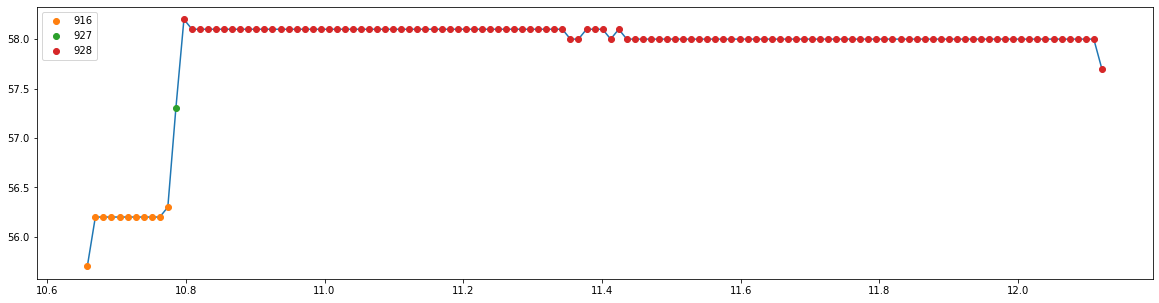

In [96]:
index_segment = index_segments[2]
# check that the indices in the segment is indeed continuous
assert np.all(np.diff(index_segment, n=1) == 1)

previous_note = notes[index_segment[0]]
segment = [index_segment[0]]
segments = []

for i in index_segment[1:]:
    if abs(notes[i] - previous_note) <= 0.5:
        segment.append(i)
        if i == index_segment[-1]:
            segments.append(segment)
    else:
        segments.append(segment)
        segment = [i]
    previous_note = notes[i]

plt.figure(figsize=(20,5))
plt.plot(times[index_segment], notes[index_segment])
for segment in segments:
    plt.plot(times[segment], notes[segment], 'o', label=segment[0])
plt.legend()
plt.show()

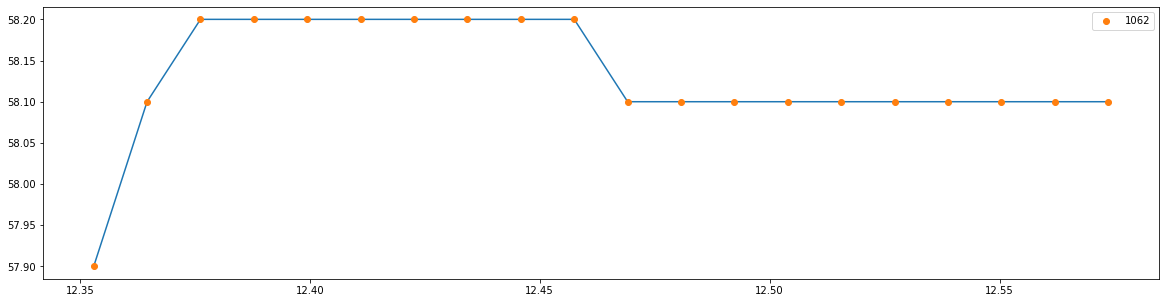

In [99]:
index_segment = index_segments[3]
# check that the indices in the segment is indeed continuous
assert np.all(np.diff(index_segment, n=1) == 1)

previous_note = notes[index_segment[0]]
segment = [index_segment[0]]
segments = []

for i in index_segment[1:]:
    if abs(notes[i] - previous_note) <= 0.5:
        segment.append(i)
        if i == index_segment[-1]:
            segments.append(segment)
    else:
        segments.append(segment)
        segment = [i]
    previous_note = notes[i]

plt.figure(figsize=(20,5))
plt.plot(times[index_segment], notes[index_segment])
for segment in segments:
    plt.plot(times[segment], notes[segment], 'o', label=segment[0])
plt.legend()
plt.show()

In [76]:
anno_file = find_anno(file)
with open(anno_file) as anno:
    anno = json.load(anno)
anno

[{'time': {'start': 6.7742, 'dur': 0.121},
  'string': 4,
  'fret': 7,
  'pitch': 56,
  'type': 'normal',
  'effects': {'hammer': True,
   'mute': False,
   'vibrato': False,
   'harmonic': False,
   'slide': False,
   'bend': False,
   'grace': False,
   'bend_type': None,
   'bend_value': None,
   'slide_types': None,
   'grace_dur': None,
   'grace_fret': None,
   'grace_trans': None}},
 {'time': {'start': 6.8952, 'dur': 1.3306},
  'string': 4,
  'fret': 9,
  'pitch': 58,
  'type': 'normal',
  'effects': {'hammer': False,
   'mute': False,
   'vibrato': False,
   'harmonic': False,
   'slide': False,
   'bend': False,
   'grace': False,
   'bend_type': None,
   'bend_value': None,
   'slide_types': None,
   'grace_dur': None,
   'grace_fret': None,
   'grace_trans': None}},
 {'time': {'start': 8.2258, 'dur': 0.2419},
  'string': 3,
  'fret': 7,
  'pitch': 61,
  'type': 'normal',
  'effects': {'hammer': False,
   'mute': False,
   'vibrato': False,
   'harmonic': False,
   'slide': F